In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import Thư viện

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dữ Liêu 

In [5]:
train = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames - Train.csv')
dev = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames - Dev.csv')
test = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames-Test.csv')
full = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames - Full.csv')

In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26851 entries, 0 to 26850
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Full_Name  26851 non-null  object
 1   Gender     26851 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 419.7+ KB


In [7]:
train.head()

,Full_Names,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1


In [8]:
dev.head()

,Full_Names,Gender
0,Trần Thanh Tâm,1
1,HỨa Phước Lợi,1
2,Nguyễn Tuyết Thảo,0
3,Nguyễn Quang Tiến,1
4,Nguyễn Thị Thảo Nguyên,0


In [9]:
test.head()

,Full_Names,Gender
0,Nguyễn Văn Tiến,1
1,Vũ Minh Nhật,1
2,Nguyễn Ngọc Thành,1
3,Lê Văn Tuấn,1
4,Nguyễn Duy Khánh,1


In [10]:
#kt missing data
train.info()
test.info()
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18795 entries, 0 to 18794
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Full_Names  18795 non-null  object
 1   Gender      18795 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 293.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Full_Names  5370 non-null   object
 1   Gender      5370 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Full_Names  2686 non-null   object
 1   Gender      2686 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.1+ KB


In [11]:
len(full)

26851

In [12]:
X_train = train['Full_Names']

In [13]:
X_train

0                  Ngô Xuân Tùng
1              Bùi Dương Thảo Vy
2                    Lưu Thế Huy
3                 Nguyễn Thị Vân
4                Dương Minh Long
                  ...           
18790       Trần Nguyễn Tường Vy
18791                Phan Hải Âu
18792    Phạm Trương Trúc Phương
18793           Nguyễn Diệu Hiền
18794       Nguyễn Đoàn Thảo Nhi
Name: Full_Names, Length: 18795, dtype: object

In [14]:
# train
X_train = train['Full_Names']
y_train =  train['Gender']
# test
X_test = test['Full_Names']
y_test =   test['Gender']
# dev
X_dev =   dev['Full_Names']
y_dev =  dev['Gender']


In [15]:
!pip install underthesea
!pip install pyvi
!pip install viet_text_tools

     |████████████████████████████████| 7.5 MB 2.0 MB/s 
     |████████████████████████████████| 3.4 MB 38.6 MB/s 
     |████████████████████████████████| 743 kB 42.6 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 235 kB 63.4 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
     |████████████████████████████████| 895 kB 48.4 MB/s 
     |████████████████████████████████| 3.3 MB 40.0 MB/s 
     |████████████████████████████████| 61 kB 442 kB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=00f2fde8ba233d9667a2f273c4b53df99016faa25108a620d05332d7e00dfa9f
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 8.5 MB 2

In [16]:
from viet_text_tools import normalize_diacritics
import re

In [17]:
#tiền xử lí dữ liệu
def pre_processing(text):
  #chuyển về chữ thường
  text = text.lower()
  #chuẩn hóa dấu thanh
  text = normalize_diacritics(text) 
  # xử lí khoản trắng kép
  text = " ".join(text.split())
  #xóa dấu các ký tự đặc biệt ở cuối
  text = re.sub(r'[^\w\s]', '', text)
  return text

In [18]:
# chuẩn hóa dataset với hàm pre_processing
for i in range(len(X_train)):
  X_train[i] = pre_processing(X_train[i])

for i in range(len(X_dev)):
  X_dev[i] = pre_processing(X_dev[i])

for i in range(len(X_test)):
  X_test[i] = pre_processing(X_test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
train['Full_Names'] = X_train 
dev['Full_Names']= X_dev
test['Full_Names'] = X_test

In [20]:
# tỉ lệ giữa nam nữ trong dataset full
sum_girl = full[full.Gender==0].shape[0]
print('Số lượng Nữ là:',sum_girl,' = > Chiếm',(sum_girl/len(full)*100),'%')
print('Số lượng Nam là:',len(full) - sum_girl,' = > Chiếm',((len(full) - sum_girl)/len(full)*100),'%')

Số lượng Nữ là: 11356  = > Chiếm 42.29265204275446 %
Số lượng Nam là: 15495  = > Chiếm 57.70734795724554 %


In [21]:
# tỉ lệ giữa nam nữ trong dataset train
sum_girl = train[train.Gender==0].shape[0]
print('Số lượng Nữ là:',sum_girl,' = > Chiếm',(sum_girl/len(train)*100),'%')
print('Số lượng Nam là:',len(train) - sum_girl,' = > Chiếm',((len(train) - sum_girl)/len(train)*100),'%')


Số lượng Nữ là: 7971  = > Chiếm 42.41021548284118 %
Số lượng Nam là: 10824  = > Chiếm 57.58978451715882 %


Text(0.5, 1.0, 'Tỉ lệ nam nữ trong tập Train')

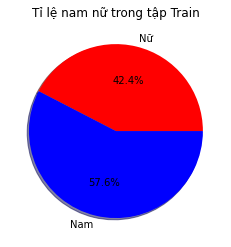

In [22]:
plt.pie(x = np.array([42.41021548284118,57.58978451715882]),
        labels = ['Nữ','Nam'],
        colors = ['red', 'blue'], # Màu sắc của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = True
       )
plt.title('Tỉ lệ nam nữ trong tập Train')

In [23]:
# tỉ lệ giữa nam nữ trong dataset test
sum_girl = test[test.Gender==0].shape[0]
print('Số lượng Nữ là:',sum_girl,' = > Chiếm',(sum_girl/len(test)*100),'%')
print('Số lượng Nam là:',len(test) - sum_girl,' = > Chiếm',((len(test) - sum_girl)/len(test)*100),'%')

Số lượng Nữ là: 2289  = > Chiếm 42.62569832402235 %
Số lượng Nam là: 3081  = > Chiếm 57.374301675977655 %


Text(0.5, 1.0, 'Tỉ lệ nam nữ trong tập Test')

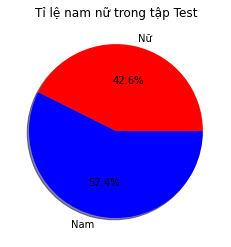

In [24]:
plt.pie(x = np.array([42.62569832402235,57.374301675977655]),
        labels = ['Nữ','Nam'],
        colors = ['red', 'blue'], # Màu sắc của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = True
       )
plt.title('Tỉ lệ nam nữ trong tập Test')

In [25]:
# tỉ lệ giữa nam nữ trong dataset dev
sum_girl = dev[dev.Gender==0].shape[0]
print('Số lượng Nữ là:',sum_girl,' = > Chiếm',(sum_girl/len(dev)*100),'%')
print('Số lượng Nam là:',len(dev) - sum_girl,' = > Chiếm',((len(dev) - sum_girl)/len(dev)*100),'%')

Số lượng Nữ là: 1096  = > Chiếm 40.80416976917349 %
Số lượng Nam là: 1590  = > Chiếm 59.19583023082651 %


Text(0.5, 1.0, 'Tỉ lệ nam nữ trong dev')

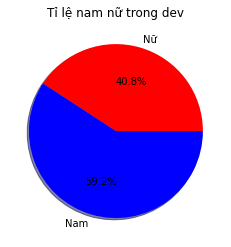

In [26]:
plt.pie(x = np.array([40.80416976917349,59.19583023082651]),
        labels = ['Nữ','Nam'],
        colors = ['red', 'blue'], # Màu sắc của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = True
       )
plt.title('Tỉ lệ nam nữ trong dev')

#Xử lí những dữ liệu có liên quan đến giới tính

In [27]:
#kiểm tra tất cả những fullname có " thị " và gender của fullname đó
from re import search
count_Thi = 0
for i in range(len(train['Full_Names'])):
  if(search(' thị ',train['Full_Names'][i])):
    count_Thi += 1;
    print(f"{train['Full_Names'][i]} {train['Gender'][i]}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
đoàn thị thảo ly 0
nguyễn thị gấm 0
phạm thị bích ngân 0
huỳnh thị trang 0
phạm thị kim liên 0
dương thị thu hiền 0
nguyễn thị thanh quyền 0
trần tiết thị thu thanh 0
hồ thị đài trang 0
trần thị quỳnh trâm 0
lê thị diễm quỳnh 0
lê thị hồng đào 0
phan thị ly 0
đinh thị hương giang 0
nguyễn thị thanh hương 0
nguyễn thị tường vi 0
võ thị ngọc như 0
võ thị trâm anh 0
nguyễn thị huệ 0
lê thị cẩm tú 0
trương thị hải 0
đoàn thị my 0
đinh thị thu uyên 0
vương thị ngọc huyền 0
hoàng thị lâm oanh 1
nguyễn thị trâm 0
trần thị hồng hạnh 0
nguyễn thị thảo nhi 0
trần thị mỹ linh 0
đoàn thị ngân 0
trương thị mỹ linh 0
võ ngô thị hương 0
nguyễn thị minh chi 0
bùi thị xuân quỳnh 0
trần thị ngọc lanh 0
nguyễn thị mỹ kiều 0
trương thị tường vi 0
đỗ thị mai 0
hồ thị phương hảo 0
ngô thị ngọc tú 0
nguyễn thị hằng 0
nguyễn thị mai trinh 0
huỳnh thị ngọc minh 0
trần thị dân 0
nguyễn thị vân 0
nguyễn thị anh đào 0
trần thị ngọc trinh 0
văn thị cẩm lài 0

In [28]:
count_Thi


5068

In [29]:
# lấy ra những bạn mà trong fullname có " thị " là nữ và những bạn như v nhưng là nam => nên sài cách này (Hải nghĩ z =)))
from re import search
count_Thi_la_nam = 0
count_Thi_la_nu = 0
for i in range(len(train['Full_Names'])):
  if(search(' thị ',train['Full_Names'][i])):
    if(train['Gender'][i]==0):
      count_Thi_la_nu += 1
      print(f"{train['Full_Names'][i]} {train['Gender'][i]}")
    elif(train['Gender'][i]==1):
      count_Thi_la_nam += 1;
      print(f"{train['Full_Names'][i]} {train['Gender'][i]}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
đoàn thị thảo ly 0
nguyễn thị gấm 0
phạm thị bích ngân 0
huỳnh thị trang 0
phạm thị kim liên 0
dương thị thu hiền 0
nguyễn thị thanh quyền 0
trần tiết thị thu thanh 0
hồ thị đài trang 0
trần thị quỳnh trâm 0
lê thị diễm quỳnh 0
lê thị hồng đào 0
phan thị ly 0
đinh thị hương giang 0
nguyễn thị thanh hương 0
nguyễn thị tường vi 0
võ thị ngọc như 0
võ thị trâm anh 0
nguyễn thị huệ 0
lê thị cẩm tú 0
trương thị hải 0
đoàn thị my 0
đinh thị thu uyên 0
vương thị ngọc huyền 0
hoàng thị lâm oanh 1
nguyễn thị trâm 0
trần thị hồng hạnh 0
nguyễn thị thảo nhi 0
trần thị mỹ linh 0
đoàn thị ngân 0
trương thị mỹ linh 0
võ ngô thị hương 0
nguyễn thị minh chi 0
bùi thị xuân quỳnh 0
trần thị ngọc lanh 0
nguyễn thị mỹ kiều 0
trương thị tường vi 0
đỗ thị mai 0
hồ thị phương hảo 0
ngô thị ngọc tú 0
nguyễn thị hằng 0
nguyễn thị mai trinh 0
huỳnh thị ngọc minh 0
trần thị dân 0
nguyễn thị vân 0
nguyễn thị anh đào 0
trần thị ngọc trinh 0
văn thị cẩm lài 0

In [30]:
count_Thi_la_nam


48

In [31]:
count_Thi_la_nu

5020

In [32]:
#In ra những bạn có " thị " trong fullname nhưng là nam
from re import search
for i in range(len(train['Full_Names'])):
  if(search(' thị ',train['Full_Names'][i]) and train['Gender'][i] == 1):
    print(f"index: {i} {train['Full_Names'][i]} {train['Gender'][i]}")

index: 79 huỳnh thị triều 1
index: 157 phan thị hải huệ 1
index: 363 hoàng thị lâm oanh 1
index: 490 trần thị thanh liễu 1
index: 1389 nguyễn thị ngọc trang 1
index: 1531 phạm thị phương thảo 1
index: 1616 lưu thị trần truyền 1
index: 2011 quảng thị thu hương 1
index: 2320 nguyễn thị thu hồng 1
index: 2831 quảng thị hồng quả 1
index: 3033 phạm thị hồng vy 1
index: 3156 tạ thị kim luyến 1
index: 3170 phạm thị cúc 1
index: 3844 ngô thị thanh diệu 1
index: 5459 ngô thị hậu 1
index: 6914 phan thị thanh hằng 1
index: 7191 đỗ thị liên 1
index: 7536 đoàn thị nga 1
index: 7909 phan thị thu hiền 1
index: 8756 lê thị đoan thùy 1
index: 9183 tô thị mỹ diễm 1
index: 9456 phạm thị kim phượng 1
index: 9672 trần thị thanh nga 1
index: 10696 đặng thị minh như 1
index: 11279 nguyễn thị thu trang 1
index: 11309 nguyễn thị thu hà 1
index: 11386 trần thị hà 1
index: 12458 hà thị hải 1
index: 12812 nguyễn thị cẩm tiên 1
index: 13139 ngô thị ngọc trâm 1
index: 13346 nguyễn thị ngọc lan 1
index: 13504 mai th

In [33]:
from re import search
count_Van = 0
for i in range(len(train['Full_Names'])):
  if(search(' văn ',train['Full_Names'][i])):
    count_Van += 1;
    print(f"{train['Full_Names'][i]} {train['Gender'][i]}")

nguyễn văn khánh 1
nguyễn văn trọng 1
lê văn hùng 1
mai văn bình 1
lương văn giàu 1
phạm văn nhơn 1
hoàng văn dũng 1
ngô văn thanh 1
lê văn tuấn 1
đoàn văn đắc 1
trần văn nhiều 1
trần văn thuận 1
phạm văn nhanh 1
nguyễn văn lý 1
trần văn nam 1
đặng văn khải 1
nguyễn văn thái an 1
nguyễn văn khải 1
lâm văn tý 1
nguyễn văn hùng 1
lương văn tây 1
hứa văn thuần 1
huỳnh văn hoàng 1
lưu văn tình 1
nguyễn văn phú 1
vũ văn tuân 1
phạm văn hạnh 1
võ văn tài triển 1
lê văn hạnh 1
nguyễn văn dũng 1
đào văn huy 1
nguyễn văn định 1
hoàng văn hiếu nhân 1
nguyễn văn hào 1
bùi văn thi 1
bành văn tiến 1
phùng văn quốc tuấn 1
phạm văn hậu 1
nguyễn văn trường 1
trần văn phương 1
hồ văn quí 1
nguyễn văn phải 1
lê văn lộc 1
đặng văn dang 1
nguyễn văn huấn 1
nguyễn văn đức 1
tăng văn hiện 1
lê văn hùng 1
nguyễn văn thuận 1
phan văn bạc 1
nguyễn văn hưng 1
nguyễn văn luân 1
nguyễn huỳnh văn hiếu 1
nguyễn văn chính 1
nguyễn văn chương 1
hoàng văn hùng 1
tô văn hiếu 1
đặng văn thanh 1
võ văn phát 1
dương văn m

In [34]:
count_Van

1083

In [35]:
# tương tự như trên làm cho những bạn có " văn " trong fullname và tiến hành kiểm tra giới tính
from re import search
count_Van_la_nam = 0
count_Van_la_nu = 0
for i in range(len(train['Full_Names'])):
  if(search(' văn ',train['Full_Names'][i])):
    if(train['Gender'][i]==0):
      count_Van_la_nu += 1
      print(f"{train['Full_Names'][i]} {train['Gender'][i]}")
    elif(train['Gender'][i]==1):
      count_Van_la_nam += 1;
      print(f"{train['Full_Names'][i]} {train['Gender'][i]}")

nguyễn văn khánh 1
nguyễn văn trọng 1
lê văn hùng 1
mai văn bình 1
lương văn giàu 1
phạm văn nhơn 1
hoàng văn dũng 1
ngô văn thanh 1
lê văn tuấn 1
đoàn văn đắc 1
trần văn nhiều 1
trần văn thuận 1
phạm văn nhanh 1
nguyễn văn lý 1
trần văn nam 1
đặng văn khải 1
nguyễn văn thái an 1
nguyễn văn khải 1
lâm văn tý 1
nguyễn văn hùng 1
lương văn tây 1
hứa văn thuần 1
huỳnh văn hoàng 1
lưu văn tình 1
nguyễn văn phú 1
vũ văn tuân 1
phạm văn hạnh 1
võ văn tài triển 1
lê văn hạnh 1
nguyễn văn dũng 1
đào văn huy 1
nguyễn văn định 1
hoàng văn hiếu nhân 1
nguyễn văn hào 1
bùi văn thi 1
bành văn tiến 1
phùng văn quốc tuấn 1
phạm văn hậu 1
nguyễn văn trường 1
trần văn phương 1
hồ văn quí 1
nguyễn văn phải 1
lê văn lộc 1
đặng văn dang 1
nguyễn văn huấn 1
nguyễn văn đức 1
tăng văn hiện 1
lê văn hùng 1
nguyễn văn thuận 1
phan văn bạc 1
nguyễn văn hưng 1
nguyễn văn luân 1
nguyễn huỳnh văn hiếu 1
nguyễn văn chính 1
nguyễn văn chương 1
hoàng văn hùng 1
tô văn hiếu 1
đặng văn thanh 1
võ văn phát 1
dương văn m

In [36]:

from re import search
count_Thi = 0
for i in range(len(train['Full_Names'])):
  if(search(' văn ',train['Full_Names'][i])):
    count_Thi += 1;
    print(f"{train['Full_Names'][i]} {train['Gender'][i]}")

nguyễn văn khánh 1
nguyễn văn trọng 1
lê văn hùng 1
mai văn bình 1
lương văn giàu 1
phạm văn nhơn 1
hoàng văn dũng 1
ngô văn thanh 1
lê văn tuấn 1
đoàn văn đắc 1
trần văn nhiều 1
trần văn thuận 1
phạm văn nhanh 1
nguyễn văn lý 1
trần văn nam 1
đặng văn khải 1
nguyễn văn thái an 1
nguyễn văn khải 1
lâm văn tý 1
nguyễn văn hùng 1
lương văn tây 1
hứa văn thuần 1
huỳnh văn hoàng 1
lưu văn tình 1
nguyễn văn phú 1
vũ văn tuân 1
phạm văn hạnh 1
võ văn tài triển 1
lê văn hạnh 1
nguyễn văn dũng 1
đào văn huy 1
nguyễn văn định 1
hoàng văn hiếu nhân 1
nguyễn văn hào 1
bùi văn thi 1
bành văn tiến 1
phùng văn quốc tuấn 1
phạm văn hậu 1
nguyễn văn trường 1
trần văn phương 1
hồ văn quí 1
nguyễn văn phải 1
lê văn lộc 1
đặng văn dang 1
nguyễn văn huấn 1
nguyễn văn đức 1
tăng văn hiện 1
lê văn hùng 1
nguyễn văn thuận 1
phan văn bạc 1
nguyễn văn hưng 1
nguyễn văn luân 1
nguyễn huỳnh văn hiếu 1
nguyễn văn chính 1
nguyễn văn chương 1
hoàng văn hùng 1
tô văn hiếu 1
đặng văn thanh 1
võ văn phát 1
dương văn m

In [37]:
count_Van_la_nam

1081

In [38]:
count_Van_la_nu

2

In [39]:
#phân tích lỗi trong tập test
from re import search
for i in range(len(test['Full_Names'])):
  if(search('nguyễn xuân ngọc',test['Full_Names'][i])):
    print(f"index: {i} {test['Full_Names'][i]} {test['Gender'][i]}")

index: 4949 nguyễn xuân ngọc 0


In [40]:
test

,Full_Names,Gender
0,nguyễn văn tiến,1
1,vũ minh nhật,1
2,nguyễn ngọc thành,1
3,lê văn tuấn,1
4,nguyễn duy khánh,1
...,...,...
5365,đoàn thị bảo thu,0
5366,ôn hoa thu,1
5367,nguyễn thị huỳnh như,0
5368,nguyễn thị hồng phúc,0


In [41]:
#In ra bạn có " văn " trong tên nhưng là nữ
from re import search
for i in range(len(train['Full_Names'])):
  if(search(' văn ',train['Full_Names'][i]) and train['Gender'][i] == 0):
    print(f"index: {i} {train['Full_Names'][i]} {train['Gender'][i]}")

index: 6700 nguyễn văn nữ tường hoanh 0
index: 18624 lâm văn ngọc yến 0


In [42]:
# from re import search
# def checkNames(names):
#     if search(" thị ", names):
#         return 0
#     return 1

In [43]:
# train['checked'] = train['Full_Names'].apply(lambda X: checkNames(X))

In [44]:
train

,Full_Names,Gender
0,ngô xuân tùng,1
1,bùi dương thảo vy,0
2,lưu thế huy,1
3,nguyễn thị vân,0
4,dương minh long,1
...,...,...
18790,trần nguyễn tường vy,0
18791,phan hải âu,1
18792,phạm trương trúc phương,0
18793,nguyễn diệu hiền,0


In [45]:
#cắt "họ" ra
Surname = [] 
for i in range(len(train['Full_Names'])):
  Surname.append(train['Full_Names'][i].split(" ",1)[0])
Surname
train['Surname'] = Surname
train['Surname']

0           ngô
1           bùi
2           lưu
3        nguyễn
4         dương
          ...  
18790      trần
18791      phan
18792      phạm
18793    nguyễn
18794    nguyễn
Name: Surname, Length: 18795, dtype: object

In [46]:
#cắt tên đệm + thật ra
Given_name= [] 
for i in range(len(train.Full_Names)):
  Given_name.append(train['Full_Names'][i].split(" ",1)[-1])
train['Given_name'] = Given_name
train['Given_name']

0                 xuân tùng
1             dương thảo vy
2                   thế huy
3                   thị vân
4                 minh long
                ...        
18790       nguyễn tường vy
18791                hải âu
18792    trương trúc phương
18793             diệu hiền
18794         đoàn thảo nhi
Name: Given_name, Length: 18795, dtype: object

In [47]:
#xử lí tập test
Surname = []
for i in range(len(test['Full_Names'])):
  Surname.append(test['Full_Names'][i].split(" ",1)[0])
Surname
test['Surname'] = Surname
test['Surname']

0       nguyễn
1           vũ
2       nguyễn
3           lê
4       nguyễn
         ...  
5365      đoàn
5366        ôn
5367    nguyễn
5368    nguyễn
5369     dương
Name: Surname, Length: 5370, dtype: object

In [48]:
# đệm + tên
Given_name = [] 
for i in range(len(test.Full_Names)):
  Given_name.append(test['Full_Names'][i].split(" ",1)[-1])
test['Given_name'] = Given_name
test['Given_name']

0            văn tiến
1           minh nhật
2          ngọc thành
3            văn tuấn
4           duy khánh
            ...      
5365      thị bảo thu
5366          hoa thu
5367    thị huỳnh như
5368    thị hồng phúc
5369          mỹ uyên
Name: Given_name, Length: 5370, dtype: object

In [49]:
#xử lí tập dev
Surname  = []
for i in range(len(dev['Full_Names'])):
  Surname.append(dev['Full_Names'][i].split(" ",1)[0])
Surname 
dev['Surname'] = Surname 
dev['Surname']

0         trần
1          hứa
2       nguyễn
3       nguyễn
4       nguyễn
         ...  
2681        lê
2682       ngô
2683    nguyễn
2684        võ
2685        lê
Name: Surname, Length: 2686, dtype: object

In [50]:
#đệm + tên
Given_name = []  
for i in range(len(dev.Full_Names)):
  Given_name.append(dev['Full_Names'][i].split(" ",1)[-1])
dev['Given_name'] = Given_name
dev['Given_name']

0              thanh tâm
1              phước lợi
2             tuyết thảo
3             quang tiến
4        thị thảo nguyên
              ...       
2681              văn đô
2682          minh phong
2683    ngọc quang thịnh
2684          ngọcthi ân
2685        thị kim thùy
Name: Given_name, Length: 2686, dtype: object

In [51]:
# sắp xếp lại cho đúng thứ tự => chỉ đối với tập train 
columns_title =  ['Surname','Given_name','Full_Names','Gender']
train=train.reindex(columns=columns_title)
columns_title =  ['Surname','Given_name','Full_Names','Gender']
test=test.reindex(columns=columns_title)
columns_title =  ['Surname','Given_name','Full_Names','Gender']
dev=dev.reindex(columns=columns_title)

In [52]:
train

,Surname,Given_name,Full_Names,Gender
0,ngô,xuân tùng,ngô xuân tùng,1
1,bùi,dương thảo vy,bùi dương thảo vy,0
2,lưu,thế huy,lưu thế huy,1
3,nguyễn,thị vân,nguyễn thị vân,0
4,dương,minh long,dương minh long,1
...,...,...,...,...
18790,trần,nguyễn tường vy,trần nguyễn tường vy,0
18791,phan,hải âu,phan hải âu,1
18792,phạm,trương trúc phương,phạm trương trúc phương,0
18793,nguyễn,diệu hiền,nguyễn diệu hiền,0


In [53]:
#xử lí tập full
Surname  = []
for i in range(len(full.Full_Name)):
  Surname.append(full['Full_Name'][i].split(" ",2)[0])
full['Surname'] = Surname 
full['Surname']

0           Ngô
1           Bùi
2           Lưu
3        Nguyễn
4         Dương
          ...  
26846      Đoàn
26847        Ôn
26848    Nguyễn
26849    Nguyễn
26850     Dương
Name: Surname, Length: 26851, dtype: object

In [54]:
Given_name = []
for i in range(len(full.Full_Name)):
  Given_name.append(full['Full_Name'][i].split(" ",2)[-1])
full['Given_name'] = Given_name
full['Given_name']

0             Tùng
1          Thảo Vy
2              Huy
3              Vân
4             Long
           ...    
26846      Bảo Thu
26847          Thu
26848    Huỳnh Như
26849    Hồng Phúc
26850         Uyên
Name: Given_name, Length: 26851, dtype: object

In [55]:
midle = []
for i in range(len(full.Full_Name)):
      a = full['Full_Name'][i].split(" ",2)[1:-1]
      a = "".join(a)
      midle.append(a)
full['midle'] = midle 
full['midle']

0         Xuân
1        Dương
2          Thế
3          Thị
4         Minh
         ...  
26846      Thị
26847      Hoa
26848      Thị
26849      Thị
26850       Mỹ
Name: midle, Length: 26851, dtype: object

In [56]:
columns_title =  ['Surname','midle','Given_name','Full_Name','Gender']
full=full.reindex(columns=columns_title)

In [57]:
full

,Surname,midle,Given_name,Full_Name,Gender
0,Ngô,Xuân,Tùng,Ngô Xuân Tùng,1
1,Bùi,Dương,Thảo Vy,Bùi Dương Thảo Vy,0
2,Lưu,Thế,Huy,Lưu Thế Huy,1
3,Nguyễn,Thị,Vân,Nguyễn Thị Vân,0
4,Dương,Minh,Long,Dương Minh Long,1
...,...,...,...,...,...
26846,Đoàn,Thị,Bảo Thu,Đoàn Thị Bảo Thu,0
26847,Ôn,Hoa,Thu,Ôn Hoa Thu,1
26848,Nguyễn,Thị,Huỳnh Như,Nguyễn Thị Huỳnh Như,0
26849,Nguyễn,Thị,Hồng Phúc,Nguyễn Thị Hồng Phúc,0


In [58]:
# lấy ra tất cả nữ và nam riêng biệt từ tập full và tách cái họ ra
# surname_girls = []
# surname_boys = []
# for i in range(len(full)):
#   if(full['Gender'][i] == 0):
#     surname_girls.append(full.Surname[i])
#   elif(full['Gender'][i]== 1):
#     surname_boys.append(full.Surname[i])

In [59]:
#hải nghĩ là lúc huấn luyện mô hình mình k nên sài tập full nữa
# vì họ đã chia tập full ra cho mình r, nên khi thao tác hay quấn luyện mô hình
# hải nghĩ mình chỉ được thao tác với tập train thôi

# lấy ra tất cả nữ và nam riêng biệt từ tập train và tách cái họ ra
surname_girls = []
surname_boys = []
for i in range(len(train)):
  if(train['Gender'][i] == 0):
    surname_girls.append(train.Surname[i])
  elif(train['Gender'][i]== 1):
    surname_boys.append(train.Surname[i])


In [60]:
surname_girls

['bùi',
 'nguyễn',
 'trần',
 'nguyễn',
 'nguyễn',
 'lê',
 'thạch',
 'võ',
 'phạm',
 'đinh',
 'lương',
 'nguyễn',
 'bùi',
 'võ',
 'đinh',
 'phan',
 'hồ',
 'nguyễn',
 'trương',
 'hoàng',
 'lê',
 'nguyễn',
 'đào',
 'trần',
 'lê',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'phan',
 'phan',
 'huỳnh',
 'đinh',
 'huỳnh',
 'lai',
 'nguyễn',
 'võ',
 'lý',
 'danh',
 'bùi',
 'nguyễn',
 'dương',
 'nguyễn',
 'tô',
 'võ',
 'đặng',
 'trương',
 'trần',
 'võ',
 'ka',
 'nguyễn',
 'lê',
 'lê',
 'mạch',
 'nguyễn',
 'dương',
 'trần',
 'nguyễn',
 'lê',
 'chu',
 'võ',
 'nguyễn',
 'đoàn',
 'nguyễn',
 'nguyễn',
 'đặng',
 'lê',
 'nguyễn',
 'tiên',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'lê',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'từ',
 'trần',
 'hồ',
 'nguyễn',
 'nguyễn',
 'dương',
 'phan',
 'nguyễn',
 'phạm',
 'dương',
 'vương',
 'trần',
 'nguyễn',
 'mai',
 'trương',
 'chu',
 'bùi',
 'lê',
 'võ',
 'nguyễn',
 'nguyễn',
 'ngô',
 'đỗ',
 'đoàn',
 'nguyễn',
 'phạm',
 'nguyễn',
 'lê',
 'mai',
 'huỳnh',
 'phạm',


In [61]:
surname_boys

['ngô',
 'lưu',
 'dương',
 'nguyễn',
 'thi',
 'nguyễn',
 'nguyễn',
 'ngô',
 'hoàng',
 'đào',
 'đỗ',
 'huỳnh',
 'đinh',
 'bùi',
 'nguyễn',
 'trịnh',
 'bùi',
 'trần',
 'nguyễn',
 'đặng',
 'võ',
 'nguyễn',
 'nguyễn',
 'hồ',
 'lê',
 'phạm',
 'nguyễn',
 'nguyễn',
 'lương',
 'cao',
 'phạm',
 'phạm',
 'trần',
 'nguyễn',
 'chướng',
 'phan',
 'nguyễn',
 'nguyễn',
 'trần',
 'phan',
 'biện',
 'trần',
 'lê',
 'nguyễn',
 'lê',
 'vũ',
 'nguyễn',
 'đặng',
 'võ',
 'nguyễn',
 'huỳnh',
 'tào',
 'nguyễn',
 'nguyễn',
 'trần',
 'lê',
 'danh',
 'hoàng',
 'nguyễn',
 'trần',
 'nguyễn',
 'trần',
 'lê',
 'đinh',
 'phan',
 'phan',
 'võ',
 'nguyễn',
 'trịnh',
 'đỗ',
 'phạm',
 'phạm',
 'nguyễn',
 'trần',
 'nguyễn',
 'phạm',
 'nguyễn',
 'mai',
 'phan',
 'trần',
 'trần',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'lý',
 'võ',
 'nguyễn',
 'trần',
 'nguyễn',
 'trần',
 'lê',
 'nguyễn',
 'nguyễn',
 'nguyễn',
 'lưu',
 'bùi',
 'bùi',
 'bùi',
 'ngô',
 'nguyễn',
 'phan',
 'võ',
 'bạch',
 'trần',
 'nguyễn',
 'ng

In [62]:
# vẽ ra "họ" -> xem họ nào tỉ lệ nhiều nhất-> đối với nữ
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 500, width=800, background_color = 'white').generate_from_text(' '.join(surname_girls))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [63]:
# vẽ ra "họ" -> xem họ nào tỉ lệ nhiều nhất-> đối với nam
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 500, width=800, background_color = 'white').generate_from_text(' '.join(surname_boys))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [64]:
# lấy ra tất cả nữ và nam riêng biệt từ tập full và tách tên đệm riêng

# tách tên đệm riêng ra cho NAM và NỮ
midle_girls = []
midle_boys = []
for i in range(len(full)):
  if(full['Gender'][i] == 0):
    midle_girls.append(full.midle[i])
  elif(full['Gender'][i]== 1):
    midle_boys.append(full.midle[i])

In [65]:
midle_girls

['Dương',
 'Thị',
 'Mai',
 'Thị',
 'Mai',
 'Trúc',
 'Thị',
 'Thị',
 'Thị',
 'Kim',
 'Thị',
 'Thị',
 'Thái',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Nguyễn',
 'Thị',
 'Huỳnh',
 'Ngọc',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Mai',
 'Thị',
 'Thị',
 'Thị',
 'Trà',
 'Thị',
 'Ái',
 'Thị',
 'Ánh',
 'Thị',
 'Khánh',
 'Thị',
 'Thị',
 'Thị',
 'Thùy',
 'Thị',
 'Thu',
 'Thị',
 'Thu',
 'Thị',
 'Trần',
 'Thị',
 'Tuyết',
 'Thị',
 'Thị',
 'Thị',
 'Nữ',
 'Thị',
 'Thị',
 'Huỳnh',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Như',
 'Khắc',
 'Thị',
 'Ngọc',
 'Thị',
 'Thị',
 'Giang',
 'Thị',
 'Thị',
 'Tú',
 'Thị',
 'Thị',
 'Kim',
 'Thị',
 'Thị',
 'Ngọc',
 'Thị',
 'Thị',
 'Thị',
 'Khánh',
 'Thu',
 'Thị',
 'Thị',
 'Thị',
 'Phương',
 'Thị',
 'Thị',
 'Quỳnh',
 'Kim',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Ngọc',
 'Thị',
 'Thị',
 'Thị',
 'Phan',
 'Dương',
 'Phạm',
 'Thị',
 'Thị',
 'Thùy',
 'Thị',
 'YẾn',
 'Lễ',
 'Thị',
 'Ngọc',
 'Tiết',
 'Thị',
 'Thị',
 'Thị',
 'Thị',
 'Hồng',
 'Qua

In [66]:
# vẽ vời với midle name -> nam
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 500, width=800, background_color = 'white').generate_from_text(' '.join(midle_boys))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [67]:
# vẽ vời với midle name -> nữ
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 500, width=800, background_color = 'white').generate_from_text(' '.join(midle_girls))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [68]:
# lấy ra tất cả nữ và nam riêng biệt từ tập full và tách tên riêng
given_name_girls = []
given_name_boys = []
for i in range(len(full)):
  if(full['Gender'][i] == 0):
    given_name_girls.append(full.Given_name[i])
  elif(full['Gender'][i]== 1):
    given_name_boys.append(full.Given_name[i])

In [69]:
# vẽ vời với given_name  -> nam
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 500, width=800, background_color = 'white').generate_from_text(' '.join(given_name_boys))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [70]:
# top 10 cái tên thg xuyên xuất hiện

In [71]:
# vẽ vời với given name -> nữ
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 500, width=800, background_color = 'white').generate_from_text(' '.join(given_name_girls))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [72]:
# đặt lại Xtrain,.....  
# Nên chọn cái Midle + last name nha ae Hải sẽ cải thiện độ đo ở dưới 
#cái này cũng nên ghi vào báo cáo nè .

# Để cải thiện hiệu xuất của mô hình 
X_train = train['Given_name']
X_test = test['Given_name']
X_dev = dev['Given_name']

In [73]:
#feature extraction
#vector hóa text thành matrix
# X_features = train['Midle + last name']
# X_test = test['Midle + last name']
# X_dev = dev['Full_Names']
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
Cv_vectorizer = Vectorizer.fit(X_train)
X_train = Cv_vectorizer.transform(X_train).toarray()
X_test = Cv_vectorizer.transform(X_test).toarray()
X_dev  = Cv_vectorizer.transform(X_dev).toarray()

In [74]:
print('---------------')
print('Vector trên train \n',X_train )
print('----------------------')
print('Vector  trên dev \n',  X_dev)
print('---------------')
print('Vector trên test \n', X_test )

---------------
Vector trên train 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------
Vector  trên dev 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---------------
Vector trên test 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
X_test.shape

(5370, 1076)

In [76]:
# y train 
y_train = train['Gender']
# y test
y_test = test['Gender']

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#LogisticRegression

In [78]:
 from sklearn.linear_model import LogisticRegression

In [79]:
import time 
# fit the training dataset on the classifier
start_time = time.time()
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))


---- Mất 2.8953397274017334 để huấn luyện mô hình ----


In [80]:
# predict the labels on test dataset
prediction_LogisticRegression = clf.predict(X_test) #y_test_pred = f(x_test)
# Use accuracy_score function to get the accuracy

In [81]:
#95.54934823091247
print("LogisticRegression Accuracy Score -> ",accuracy_score(prediction_LogisticRegression, y_test)*100)

LogisticRegression Accuracy Score ->  95.54934823091247


In [82]:
# function dự đoán giới tính

def gender_predictor(names):
  test_name = [names]
  vector = Vectorizer.transform(test_name)
  if clf.predict(vector) == 0:
    print("Giới tính: Nữ")
  else:
    print("Giới tính: Nam")

In [83]:
# gender_predictor('nguyễn thanh minh')

In [84]:
# gender_predictor('hồ hắc hải')


In [85]:
print("LogisticRegression F1-score: ", f1_score(prediction_LogisticRegression,y_test,average='macro')*100)

LogisticRegression F1-score:  95.42909693937933


In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction_LogisticRegression,digits=4))
print(confusion_matrix(y_test, prediction_LogisticRegression))

              precision    recall  f1-score   support

           0     0.9638    0.9305    0.9469      2289
           1     0.9497    0.9740    0.9617      3081

    accuracy                         0.9555      5370
   macro avg     0.9567    0.9523    0.9543      5370
weighted avg     0.9557    0.9555    0.9554      5370

[[2130  159]
 [  80 3001]]


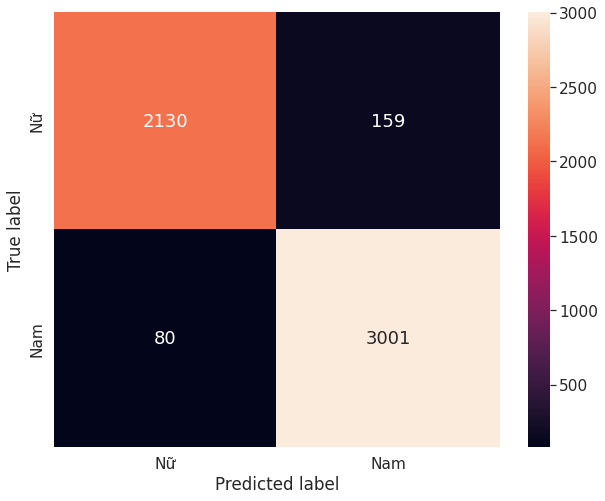

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, prediction_LogisticRegression) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [88]:
len(prediction_LogisticRegression)

5370

lấy ra những tên dữ đoán sai

In [89]:
wrong_name_prediction = []
wrong_gender_prediction = []
for i in range(len(test['Gender'])):
  if(test['Gender'][i] != prediction_LogisticRegression[i]):
     wrong_name_prediction.append(test['Given_name'][i])
     wrong_gender_prediction.append(prediction_LogisticRegression[i])
for i in range(len(wrong_name_prediction)):
  print(wrong_name_prediction[i], wrong_gender_prediction[i])

hiếu 1
ngọc hà 0
ngọc anh 1
vi riêm 0
xuân nguyên 1
minh châu 1
nguyễn châu thuận 0
thục anh 1
quốc huy 1
nhật hạ 1
an lê phú 1
hanh 1
túy mẩn 1
huyền trân 0
tiến dũng 1
thanh phương 1
thị diệu trân 0
lê ngọc minh 1
đồng đoan thục 1
hải ly 1
trí thức 1
ngọc hà 0
gia phụng 1
mai nam thái 1
naria 1
thanh xuân 1
khải nguyên 1
phương dung 0
huỳnh như ngân 0
cẩm bình 1
thế thanh thảo 1
ngọc thanh minh 1
thị hạnh dung 0
lâm quỳnh 1
lê dương hòa 1
huỳnh thanh tâm 1
phạm anh bắc 1
ngọc san đông 1
hoàng nhi 0
hồ thi các 0
khánh trúc 0
gia băng 1
huỳnh thanh bảo khánh 0
anh thi 0
lê huỳnh 0
vũ cẩm hiệp 1
hồng búp 1
ngọc giai 0
phương 1
kim bảo 0
ngọc tâm 1
diễm phúc 1
quát 1
thanh phương 1
thị thanh hiền 0
thế ngọc sương 1
cao thy 0
ngọc minh nguyên 1
ngọc hiệp 1
za lem ktla 1
triều nghi 1
hồng bảo tâm 0
hồng hường 0
tú anh 1
thị thu thắm 0
thái nguyên 1
lương bích diệp 0
huỳnh hồng đăng 1
võ di thiên 0
vũ hoài thương 1
khả phương 0
chí nghị 1
trần uyên quang 0
sơn trang 1
gia phúc 1
trung hồng 

In [90]:
len(wrong_name_prediction)

239

In [91]:
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

wc = WordCloud(height = 400, width=600, background_color = 'white').generate_from_text(' '.join(wrong_name_prediction))
px.imshow(wc)

Output hidden; open in https://colab.research.google.com to view.

In [92]:
print(wrong_name_prediction[:10])

['hiếu', 'ngọc hà', 'ngọc anh', 'vi riêm', 'xuân nguyên', 'minh châu', 'nguyễn châu thuận', 'thục anh', 'quốc huy', 'nhật hạ']


In [93]:
count = 0
for i in range(len(wrong_name_prediction)):
  if(search('ngọc',wrong_name_prediction[i])):
    print(wrong_name_prediction[i], wrong_gender_prediction[i])
    count += 1;
print("=> số lượng người là {number}".format(number = count))
# " thanh " sai 29 
# " minh " 22 
# " linh " 4
# " anh"  16  những người có chữ " anh " trong thì rất khó xác định giới tính

ngọc hà 0
ngọc anh 1
lê ngọc minh 1
ngọc hà 0
ngọc thanh minh 1
ngọc san đông 1
ngọc giai 0
ngọc tâm 1
thế ngọc sương 1
ngọc minh nguyên 1
ngọc hiệp 1
ngọc lãm 1
ngọc anh 1
ngọc an 1
ngọc tiệp 1
ngọc thanh 1
ngọc tiện 1
ngọc nhã 0
ngọc trịnh 0
ngọc kim đô 0
ngọc phương linh 0
ngọc minh anh 1
ngọc hiếu 1
nguyễn ngọc châu 0
ngọc hân 0
hải ngọc 1
ngọc phụng 0
ngọc hân 0
minh ngọc 1
kha nh ngọc 1
duy ngọc 1
hồng ngọc 0
xuân ngọc 1
ngọc bá thi 0
ngọc bảo khuyên 1
=> số lượng người là 35


In [94]:
# trường hợp của thg "lê minh châu" là cùng tên nhưng 2 giới tính trong nhãn thực tế


# so sánh 2 nhãn dự đoán và nhãn thực tế
print('============ true label ============')
for i in range(len(test)):
  if(search('xuân ngọc',test['Full_Names'][i])):
     print(f"index: {i} ,{test['Full_Names'][i],test['Gender'][i]}")
print('========== predict label ==========')
for i in range(len(wrong_name_prediction)):
  if(search('xuân ngọc',wrong_name_prediction[i])):
    print(wrong_name_prediction[i], wrong_gender_prediction[i])

============ true label ============
index: 4949 ,('nguyễn xuân ngọc', 0)
index: 5050 ,('nguyễn thị xuân ngọc', 0)
========== predict label ==========
xuân ngọc 1


#Naive_bayes

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
import time
# fit the training dataset on the classifier
start_time = time.time()
clf = MultinomialNB()
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 0.6673328876495361 để huấn luyện mô hình ----


In [97]:
# còn khi tui chọn X_train là midle_last_name thì độ đo là 95.06517690875232
#kết luận là nên chọn cái midle_last_name để cải thiện độ đo 
predictions_NV = clf.predict(X_test)
print("Naive_bayes Accuracy Score -> ",accuracy_score(predictions_NV, y_test)*100)

Naive_bayes Accuracy Score ->  95.06517690875232


In [98]:
print("Naive_bayes f1 Score -> ",f1_score(predictions_NV, y_test ,average='macro')*100)

Naive_bayes f1 Score ->  94.95516368713315


In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_NV,digits=4))
print(confusion_matrix(y_test,predictions_NV))

              precision    recall  f1-score   support

           0     0.9423    0.9419    0.9421      2289
           1     0.9568    0.9572    0.9570      3081

    accuracy                         0.9507      5370
   macro avg     0.9496    0.9495    0.9496      5370
weighted avg     0.9506    0.9507    0.9507      5370

[[2156  133]
 [ 132 2949]]


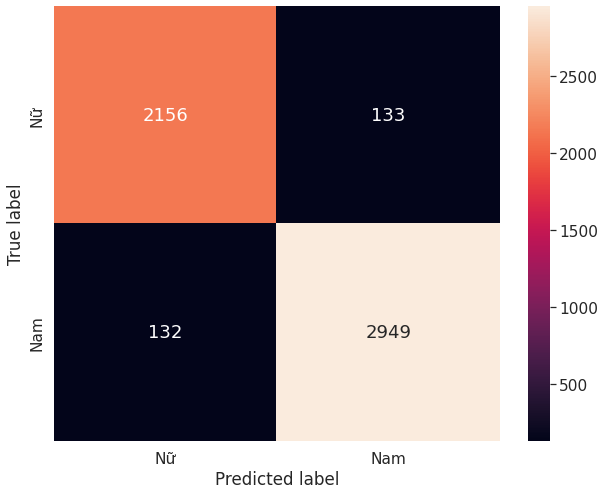

In [100]:
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test,predictions_NV) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [101]:
len(predictions_NV)

5370

**Lấy ra những cái tên đoán sai NB**

In [102]:
wrong_name_predictionNB = []
wrong_gender_predictionNB = []
for i in range(len(test['Gender'])):
  if(test['Gender'][i] != predictions_NV[i]):
     wrong_name_predictionNB.append(test['Given_name'][i])
     wrong_gender_predictionNB.append(predictions_NV[i])
for i in range(len(wrong_name_predictionNB)):
  print(wrong_name_predictionNB[i], wrong_gender_predictionNB[i])

hiếu 1
ngọc hà 0
vi riêm 0
xuân nguyên 1
minh châu 1
xuân hảo 0
quốc huy 1
nhật hạ 1
kiều hưng 0
an lê phú 1
hanh 1
túy mẩn 1
huyền trân 0
ngọc thẩm 0
tiến dũng 1
trương 0
thị diệu trân 0
lê ngọc minh 1
đồng đoan thục 1
hồng lạc 0
thanh phương 0
trí thức 1
ngọc hà 0
thanh nhàn 0
gia phụng 1
mai nam thái 1
naria 1
thanh xuân 1
khải nguyên 1
phương dung 0
hồng pha 0
huỳnh như ngân 0
thế thanh thảo 1
ngọc thanh minh 1
thị hạnh dung 0
ngọc thỏa 0
lê dương hòa 1
phạm anh bắc 1
ngọc san đông 1
hoàng nhi 0
hồ thi các 0
dương hoài nhớ 0
khánh trúc 0
phúc xuyên 0
anh thi 0
thanh hà 0
nguyễn thanh nhàn 0
ngọc giai 0
kim bảo 0
quát 1
thị thanh hiền 0
cao thy 0
ngọc minh nguyên 1
ngọc hiệp 1
za lem ktla 1
triều nghi 1
hồng bảo tâm 0
hồng hường 0
tú anh 1
thị thu thắm 0
huỳnh nhương 0
thái nguyên 1
lương bích diệp 0
lê bảo châu 1
huỳnh hồng đăng 1
minh xuyên 0
kim thuận 0
vũ hoài thương 1
khả phương 0
chí nghị 1
thanh hà 0
kim lộc 0
trần uyên quang 0
gia phúc 1
trung hồng 1
đình hương 0
thanh thọ 1

In [103]:
len(wrong_gender_predictionNB)

265

In [104]:
# so sánh 2 nhãn dự đoán và nhãn thực tế
print('============ true label ============')
for i in range(len(test)):
  if(search('nguyễn xuân ngọc',test['Full_Names'][i])):
     print(test['Full_Names'][i],test['Gender'][i])
print('========== predict label ==========')
for i in range(len(wrong_name_predictionNB)):
  if(search('nguyễn xuân ngọc',wrong_name_predictionNB[i])):
    print(wrong_name_predictionNB[i], wrong_gender_predictionNB[i])

============ true label ============
nguyễn xuân ngọc 0
========== predict label ==========


#Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
import time

# fit the training dataset on the classifier
start_time = time.time()

clf = DecisionTreeClassifier(random_state=0,max_depth=65)
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 8.126147985458374 để huấn luyện mô hình ----


In [107]:
# predict the labels on test dataset
predictions_DT = clf.predict(X_test)
# Use accuracy_score function to get the accuracy
print("DecisionTree Accuracy Score -> ",accuracy_score(predictions_DT , y_test)*100)

DecisionTree Accuracy Score ->  94.26443202979516


In [108]:
print("DecisionTree F1-score: ", f1_score(predictions_DT,y_test,average='macro')*100)

DecisionTree F1-score:  94.09791053843202


In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_DT,digits=4))
print(confusion_matrix(y_test, predictions_DT))

              precision    recall  f1-score   support

           0     0.9546    0.9087    0.9311      2289
           1     0.9345    0.9679    0.9509      3081

    accuracy                         0.9426      5370
   macro avg     0.9445    0.9383    0.9410      5370
weighted avg     0.9431    0.9426    0.9424      5370

[[2080  209]
 [  99 2982]]


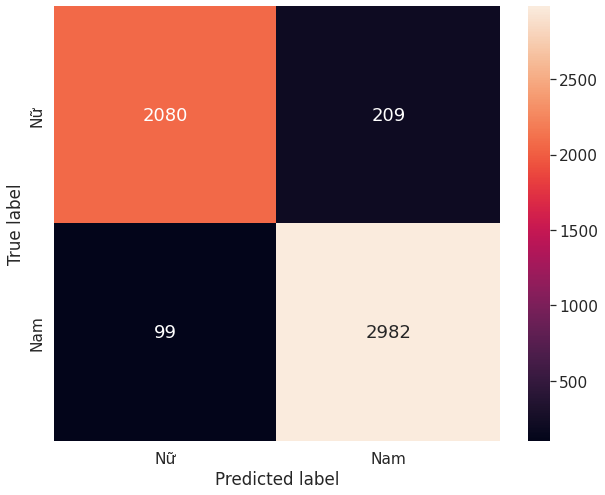

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)

# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_DT) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [111]:
wrong_name_predictionDT = []
wrong_gender_predictionDT = []
for i in range(len(test['Gender'])):
  if(test['Gender'][i] !=predictions_DT[i]):
     wrong_name_predictionDT.append(test['Full_Names'][i])
     wrong_gender_predictionDT.append(predictions_DT[i])
for i in range(len(wrong_name_predictionDT)):
  print(wrong_name_predictionDT[i], wrong_gender_predictionDT[i])

trần hiếu 1
đoàn hương quân 0
trần vi riêm 0
trương xuân nguyên 1
nguyễn ngọc hoa cúc 1
nguyễn thục anh 1
nguyễn quốc huy 1
nguyễn thi ngo quỳnh 1
phan lê duy linh 0
tăng kiều hưng 0
trần thanh nhung 1
đoàn an lê phú 1
cái ngọc anh tài 0
siu hanh 1
dương túy mẩn 1
huỳnh quang hạ 0
lã văn thùy 0
hoàng khánh chi 1
lê đức diệu 0
vương huyền trân 0
võ tiến dũng 1
nguyễn thanh phương 1
lê thị diệu trân 0
phùng như ý 1
nguyễn đồng đoan thục 1
trần trí thức 1
nguyễn ngọc minh trí 0
đặng ngọc minh 0
lê hoài thu 1
tounẻh naria 1
đặng nguyễn anh thi 1
tạ thanh xuân 1
viên khải nguyên 1
mai phương dung 0
lê huỳnh như ngân 0
nguyễn cẩm bình 1
huỳnh long tố trinh 1
nguyễn thế thanh thảo 1
nguyễn ngọc thanh minh 1
trần thị hạnh dung 0
nguyễn lâm quỳnh 1
đặng lê dương hòa 1
nguyễn huỳnh thanh tâm 1
nguyễn phạm anh bắc 1
ngô ngọc san đông 1
đinh hoàng nhi 0
võ ngọc chi 1
cao khánh trúc 0
hồ như bảo duyên 1
đặng nguyễn tố quyên 1
lê hoàng trúc vân 1
phạm hồng búp 1
nguyễn hồng mỹ 1
lâm phương 1
đoàn bí

In [112]:
len(wrong_name_predictionDT)

308

In [113]:
# so sánh 2 nhãn dự đoán và nhãn thực tế
print('============ true label ============')
for i in range(len(test)):
  if(search('nguyễn xuân ngọc',test['Full_Names'][i])):
     print(test['Full_Names'][i],test['Gender'][i])
print('========== predict label ==========')
for i in range(len(wrong_name_predictionDT)):
  if(search('nguyễn xuân ngọc',wrong_name_predictionDT[i])):
    print(wrong_name_predictionDT[i], wrong_gender_predictionDT[i])

============ true label ============
nguyễn xuân ngọc 0
========== predict label ==========
nguyễn xuân ngọc 1


#SVM

In [114]:
from sklearn import svm

In [115]:
import time 
# fit the training dataset on the classifier
start_time = time.time()

SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(X_train,y_train)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 58.13435649871826 để huấn luyện mô hình ----


In [116]:
# predict the labels on test dataset
predictions_SVM = SVM.predict(X_test) #y_test_pred = f(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM , y_test)*100)

SVM Accuracy Score ->  94.71135940409683


In [117]:
print(" SVM F1-score -> ", f1_score(predictions_SVM, y_test, average='macro')*100)

 SVM F1-score ->  94.58319883795998


In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_SVM,digits=4))
print(confusion_matrix(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0     0.9446    0.9305    0.9375      2289
           1     0.9490    0.9594    0.9542      3081

    accuracy                         0.9471      5370
   macro avg     0.9468    0.9450    0.9458      5370
weighted avg     0.9471    0.9471    0.9471      5370

[[2130  159]
 [ 125 2956]]


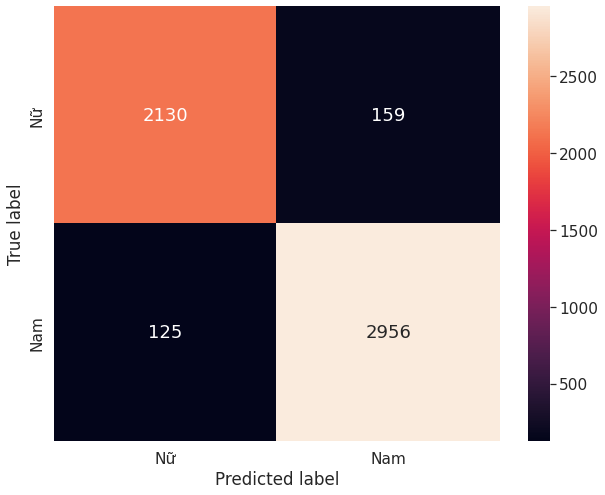

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_SVM) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [120]:
wrong_name_predictionSVM = []
wrong_gender_predictionSVM = []
for i in range(len(test['Gender'])):
  if(test['Gender'][i] != predictions_SVM[i]):
     wrong_name_predictionSVM.append(test['Full_Names'][i])
     wrong_gender_predictionSVM.append(predictions_SVM[i])
for i in range(len(wrong_name_predictionSVM)):
  print(wrong_name_predictionSVM[i], wrong_gender_predictionSVM[i])

trần hiếu 1
khưu ngọc anh 1
đoàn hương quân 0
trần vi riêm 0
trần nhã hoài an 0
nguyễn đức linh 0
trương xuân nguyên 1
võ nguyễn châu thuận 0
nguyễn quốc huy 1
phan lê duy linh 0
tăng kiều hưng 0
đoàn an lê phú 1
dương hồng ngọc 1
nguyễn ngọc thiên phương 1
siu hanh 1
dương túy mẩn 1
hoàng khánh chi 1
lê đức diệu 0
vương huyền trân 0
phạm duy linh 0
võ tiến dũng 1
dương vũ linh 0
nguyễn thanh phương 1
lê thị diệu trân 0
trần lê ngọc minh 1
trần trí thức 1
trần đức linh 0
lâm minh thi 0
liêu gia phụng 1
tounẻh naria 1
tạ thanh xuân 1
viên khải nguyên 1
mai phương dung 0
lê huỳnh như ngân 0
nguyễn ngọc đoan anh 1
nguyễn ngọc thanh minh 1
trần thị hạnh dung 0
đặng lê dương hòa 1
nguyễn huỳnh thanh tâm 1
nguyễn phạm anh bắc 1
ngô ngọc san đông 1
đinh hoàng nhi 0
nguyễn hồ thi các 0
cao dương hoài nhớ 0
võ ngọc chi 1
cao khánh trúc 0
dương đình thi 0
hoàng anh thi 0
phạm hồng búp 1
lê ngọc giai 0
trần thị chiến 1
lâm phương 1
nguyễn kim bảo 0
huỳnh thái thi 0
nguyễn ngọc tâm 1
lương lê công

In [121]:
len(wrong_name_predictionSVM)

284

In [122]:
# so sánh 2 nhãn dự đoán và nhãn thực tế
print('============ true label ============')
for i in range(len(test)):
  if(search('nguyễn xuân ngọc',test['Full_Names'][i])):
     print(test['Full_Names'][i],test['Gender'][i])
print('========== predict label ==========')
for i in range(len(wrong_name_predictionSVM)):
  if(search('nguyễn xuân ngọc',wrong_name_predictionSVM[i])):
    print(wrong_name_predictionSVM[i], wrong_gender_predictionSVM[i])

============ true label ============
nguyễn xuân ngọc 0
========== predict label ==========
nguyễn xuân ngọc 1


#RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
import time 
# fit the training dataset on the classifier
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 21.891206741333008 để huấn luyện mô hình ----


In [125]:
# predict the labels on test dataset
predictions_random_fr=clf.predict(X_test) #y_test_pred = f(x_test)
# Use accuracy_score function to get the accuracy

In [126]:
print("RandomForestClassifier Accuracy Score -> ",accuracy_score(predictions_random_fr , y_test)*100)

RandomForestClassifier Accuracy Score ->  94.22718808193669


In [127]:
print("RandomForestClassifier F1-score: ", f1_score(predictions_random_fr,y_test,average='macro')*100)

RandomForestClassifier F1-score:  94.08867855706231


In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_random_fr,digits=4))
print(confusion_matrix(y_test, predictions_random_fr))

              precision    recall  f1-score   support

           0     0.9380    0.9257    0.9318      2289
           1     0.9454    0.9546    0.9499      3081

    accuracy                         0.9423      5370
   macro avg     0.9417    0.9401    0.9409      5370
weighted avg     0.9422    0.9423    0.9422      5370

[[2119  170]
 [ 140 2941]]


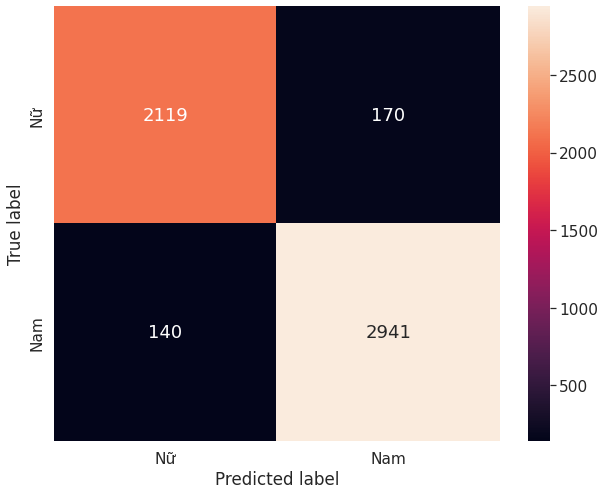

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_random_fr) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [130]:
wrong_name_predictionRD_FR = []
wrong_gender_predictionRD_FR = []
for i in range(len(test['Gender'])):
  if(test['Gender'][i] != predictions_random_fr[i]):
     wrong_name_predictionRD_FR.append(test['Full_Names'][i])
     wrong_gender_predictionRD_FR.append(predictions_random_fr[i])
for i in range(len(wrong_name_predictionRD_FR)):
  print(wrong_name_predictionRD_FR[i], wrong_gender_predictionRD_FR[i])

trần hiếu 1
đoàn hương quân 0
trần vi riêm 0
trương xuân nguyên 1
nguyễn minh châu 1
nguyễn thục anh 1
phạm hòa chính 0
nguyễn quốc huy 1
tăng kiều hưng 0
đoàn an lê phú 1
phan thiên ân 0
siu hanh 1
trịnh ngọc pháp 0
dương túy mẩn 1
bùi ngọc phát 0
hoàng khánh chi 1
vương huyền trân 0
phạm ngọc thẩm 0
võ tiến dũng 1
nguyễn thanh phương 1
lê thị diệu trân 0
phạm ngô ngọc duyệt 0
trần trí thức 1
đặng ngọc minh 0
liêu gia phụng 1
lê hoài thu 1
nguyễn mai nam thái 1
tounẻh naria 1
đặng nguyễn anh thi 1
viên khải nguyên 1
mai phương dung 0
lê huỳnh như ngân 0
nguyễn cẩm bình 1
huỳnh long tố trinh 1
nguyễn thế thanh thảo 1
mai nguyễn minh thư 1
nguyễn ngọc thanh minh 1
trần thị hạnh dung 0
đào ngọc thỏa 0
nguyễn lâm quỳnh 1
đặng lê dương hòa 1
nguyễn huỳnh thanh tâm 1
nguyễn phạm anh bắc 1
ngô ngọc san đông 1
nguyễn ngọc mẫn 0
đinh hoàng nhi 0
nguyễn hồ thi các 0
cao dương hoài nhớ 0
võ ngọc chi 1
cao khánh trúc 0
nguyễn ngọc hoàn 0
hoàng anh thi 0
bùi lê huỳnh 0
phạm hồng búp 1
lê ngọc giai

In [131]:
len(wrong_name_predictionRD_FR)

310

In [132]:
# so sánh 2 nhãn dự đoán và nhãn thực tế
print('============ true label ============')
for i in range(len(test)):
  if(search('nguyễn xuân ngọc',test['Full_Names'][i])):
     print(test['Full_Names'][i],test['Gender'][i])
print('========== predict label ==========')
for i in range(len(wrong_name_predictionRD_FR)):
  if(search('nguyễn xuân ngọc',wrong_name_predictionRD_FR[i])):
    print(wrong_name_predictionRD_FR[i], wrong_gender_predictionRD_FR[i])

============ true label ============
nguyễn xuân ngọc 0
========== predict label ==========
